# Integrentes:

* `Andresa Bicudo`
* `Gabriel Yamashita`
* `Leonardo Malta`

# Objetivo:
O objetivo desse projeto é construir um classificador que determina de a Andresa Bicudo gostará ou não de uma música, com base em seu histórico de exibição do Spotify e em suas músicas curtidas.

# Separação dos Dados:

In [14]:
# Importanto Bibliotecas para o Trabalho:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [15]:
dados = pd.read_excel('classificacao_musicas_leonardo.xlsx')
dados.head(5)

,name,like,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Ouvi Dizer,1,0.641,0.614,7,-7.847,1,0.0532,0.0745,0.000000,0.093,0.727,81.011,1qCLx3nX25NuhfPjM5E1qV,spotify:track:1qCLx3nX25NuhfPjM5E1qV,https://api.spotify.com/v1/tracks/1qCLx3nX25Nu...,https://api.spotify.com/v1/audio-analysis/1qCL...,210889,4
1,Pain 1993 (with Playboi Carti),0,0.825,0.373,5,-5.532,0,0.1080,0.1630,0.000000,0.368,0.120,77.271,6Kj17Afjo1OKJYpf5VzCeo,spotify:track:6Kj17Afjo1OKJYpf5VzCeo,https://api.spotify.com/v1/tracks/6Kj17Afjo1OK...,https://api.spotify.com/v1/audio-analysis/6Kj1...,149078,4
2,Sentimento Bom,0,0.780,0.607,9,-6.440,1,0.0864,0.2060,0.000016,0.440,0.732,130.076,0vyKzl0o1lem1sHg5wXgSD,spotify:track:0vyKzl0o1lem1sHg5wXgSD,https://api.spotify.com/v1/tracks/0vyKzl0o1lem...,https://api.spotify.com/v1/audio-analysis/0vyK...,241813,4
3,All Star,2,0.512,0.391,9,-10.400,1,0.0492,0.8890,0.000003,0.714,0.277,138.094,3g5FrnRdbmDQyWNiDIprts,spotify:track:3g5FrnRdbmDQyWNiDIprts,https://api.spotify.com/v1/tracks/3g5FrnRdbmDQ...,https://api.spotify.com/v1/audio-analysis/3g5F...,233613,4
4,Contrato de RenovaÃ§Ã£o - Ao Vivo,1,0.577,0.752,9,-7.447,1,0.0654,0.7290,0.000000,0.929,0.844,90.213,4C2eQoWJ1pkAFiZ0CDQ3Gt,spotify:track:4C2eQoWJ1pkAFiZ0CDQ3Gt,https://api.spotify.com/v1/tracks/4C2eQoWJ1pkA...,https://api.spotify.com/v1/audio-analysis/4C2e...,226951,4


In [16]:
dados.loc[:,'like'] = dados['like'].astype('category')
dados.like.cat.categories = ['hate', 'like', 'love']
dados.head(3)

,name,like,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Ouvi Dizer,like,0.641,0.614,7,-7.847,1,0.0532,0.0745,0.000000,0.093,0.727,81.011,1qCLx3nX25NuhfPjM5E1qV,spotify:track:1qCLx3nX25NuhfPjM5E1qV,https://api.spotify.com/v1/tracks/1qCLx3nX25Nu...,https://api.spotify.com/v1/audio-analysis/1qCL...,210889,4
1,Pain 1993 (with Playboi Carti),hate,0.825,0.373,5,-5.532,0,0.1080,0.1630,0.000000,0.368,0.120,77.271,6Kj17Afjo1OKJYpf5VzCeo,spotify:track:6Kj17Afjo1OKJYpf5VzCeo,https://api.spotify.com/v1/tracks/6Kj17Afjo1OK...,https://api.spotify.com/v1/audio-analysis/6Kj1...,149078,4
2,Sentimento Bom,hate,0.780,0.607,9,-6.440,1,0.0864,0.2060,0.000016,0.440,0.732,130.076,0vyKzl0o1lem1sHg5wXgSD,spotify:track:0vyKzl0o1lem1sHg5wXgSD,https://api.spotify.com/v1/tracks/0vyKzl0o1lem...,https://api.spotify.com/v1/audio-analysis/0vyK...,241813,4


In [17]:
dados['like'].value_counts()

love    366
like    288
hate    222
Name: like, dtype: int64

In [18]:
hate = dados.loc[dados['like'] == 'hate', :]
like = dados.loc[dados['like'] == 'like', :]
love = dados.loc[dados['like'] == 'love', :]

# Criando Gráficos Comparativos 

None
None
None
None
None
None
None
None
None
None
None


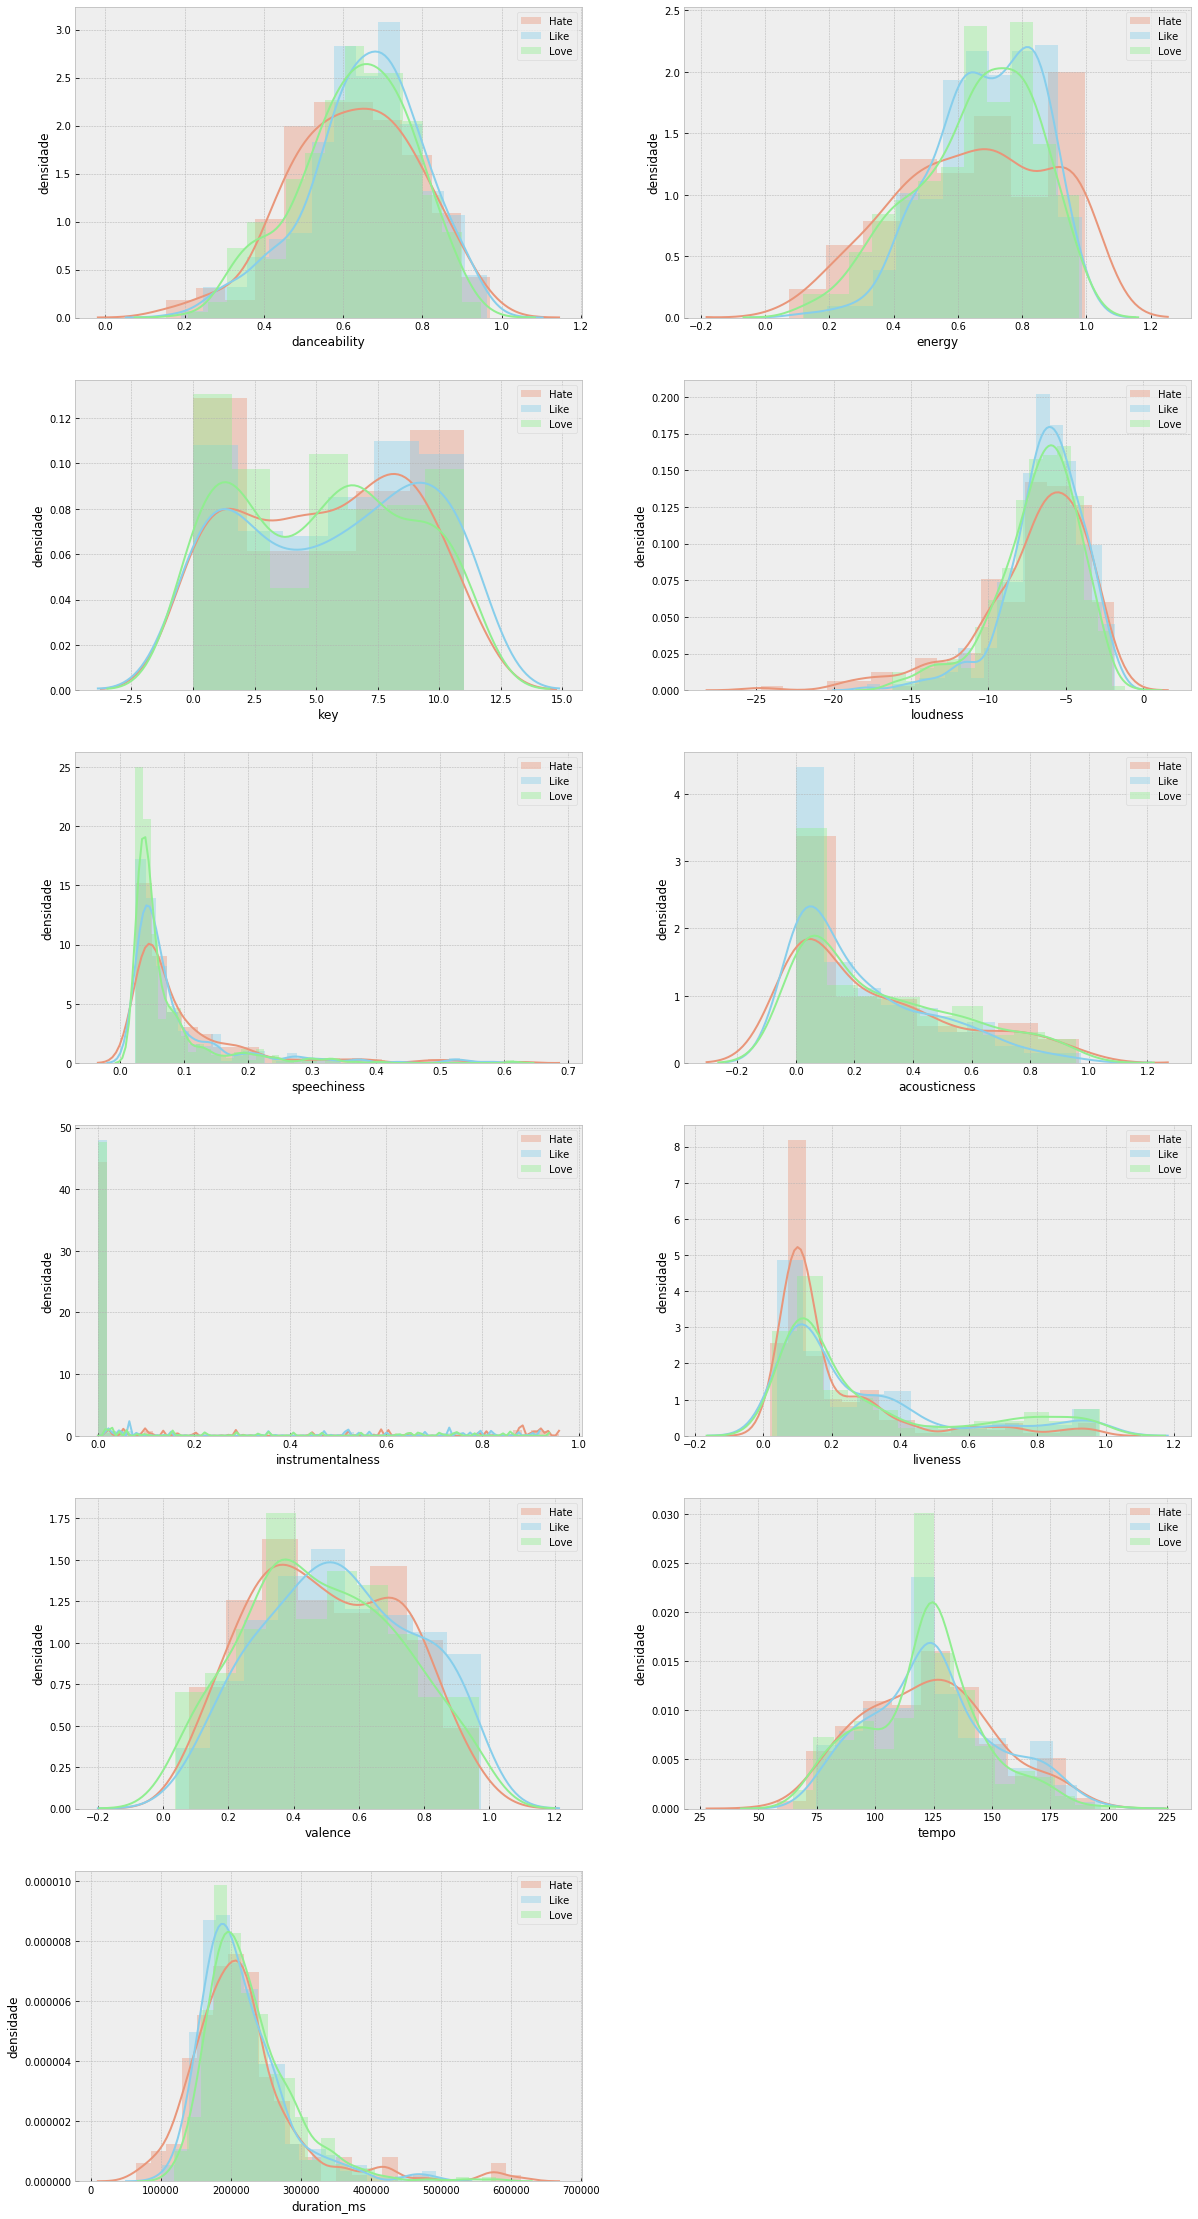

In [19]:
# Funçção para cirar histogramas em loop 
def Hist(variavel, df1, df2, df3):
    plt.style.use('bmh')
    sns.distplot( df1[variavel] , color="darksalmon", label="Hate")
    sns.distplot( df2[variavel] , color="skyblue", label="Like")
    sns.distplot( df3[variavel] , color="lightgreen", label="Love")
    plt.legend(loc='best')
    plt.ylabel('densidade')
    plt.xlabel(variavel)
    

features = ['danceability', 'energy', 'key', 'loudness', 
            'speechiness', 'acousticness', 'instrumentalness',
            'liveness', 'valence', 'tempo', 'duration_ms' ]

plt.figure(figsize=(20,40))

for i in range(len(features)):
    plt.subplot(6, 2, i+1)
    print(Hist(features[i], hate, like, love))

plt.show()